In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [50]:
df = pd.read_csv('data/creditcard.csv')

In [51]:
df.shape

(284807, 31)

In [52]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
v_features = df.iloc[:,1:29].columns

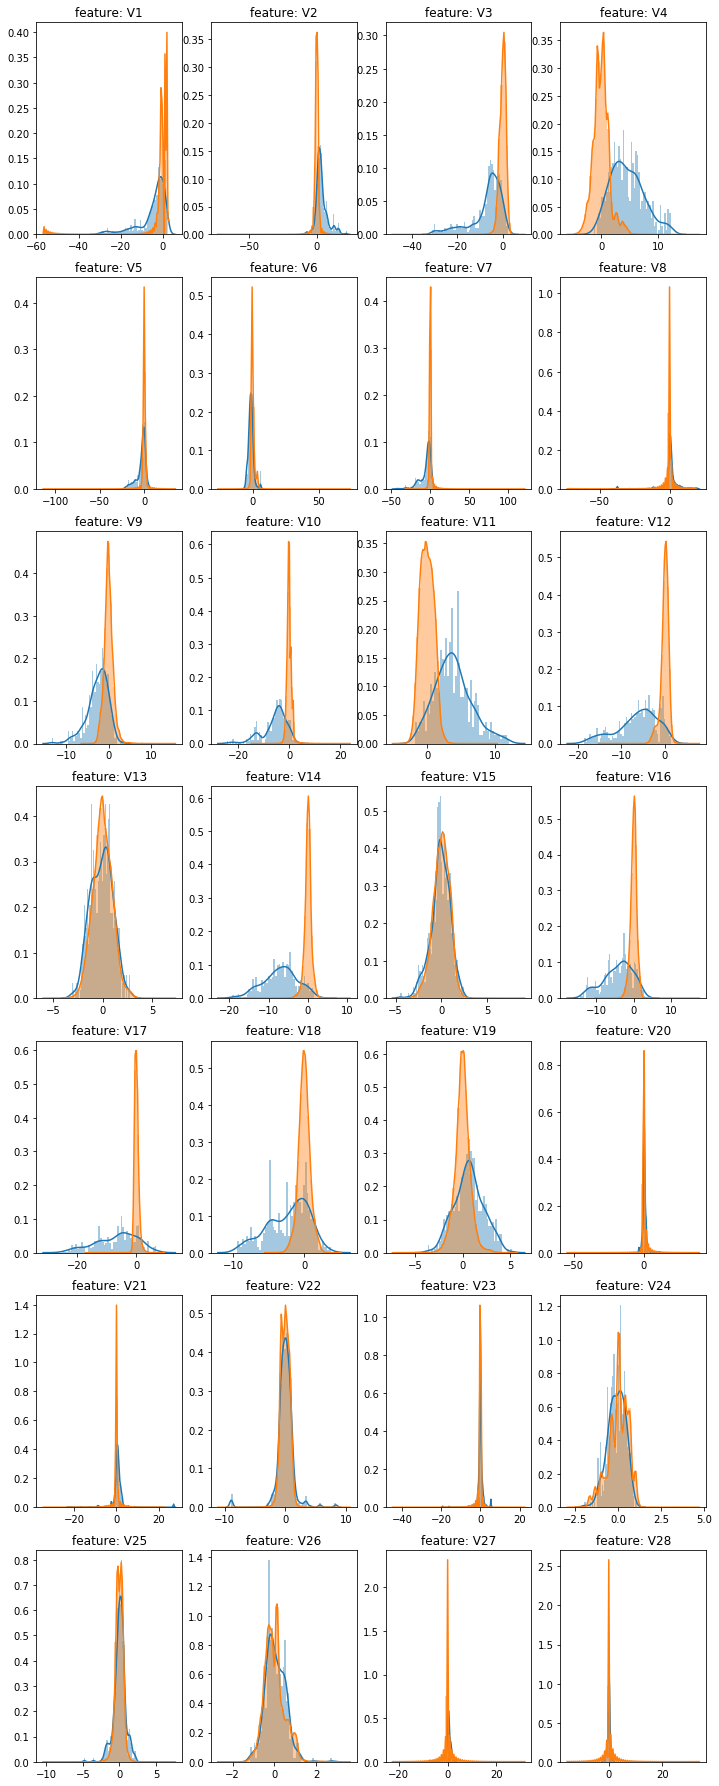

In [6]:
plt.figure(figsize=(12,8*4))
gs = gridspec.GridSpec(7, 4)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

In [10]:
features = ['V2', 'V3', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V27', 'V28', 'Class']
potential = ['V1', 'V4', 'V5', 'V8', 'V21', 'V23']

In [65]:
#df = df[features+potential]
df = df[features]
df_clean = df[df['Class'] ==0]
df_fraud = df[df['Class'] ==1]

len(df_clean) * 0.2

56863.0

In [66]:
len(df_fraud)

492

In [67]:
492/2

246.0

In [68]:
Train_df = df_clean.sample(170589)

In [69]:
Train_df.head()

,V2,V3,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V27,V28,Class
137359,4.184031,-1.503621,1.370370,-3.475925,-0.236738,-0.075912,1.878149,1.875853,-0.245225,0.477377,1.760011,0.375646,-0.214348,0.172814,0
145789,0.555584,-0.730803,-0.261437,0.201830,-1.304890,1.735074,0.574483,0.016823,0.741075,1.103929,-1.102190,0.316425,-0.054263,-0.062135,0
14515,-0.161745,2.267133,-0.288669,-0.345966,-1.711169,1.339113,-0.509057,-1.620977,-0.788072,-0.371611,0.363604,-0.012581,0.267569,-0.035769,0
53837,-0.624017,-0.185039,-1.200099,-0.105162,-1.276998,0.853823,1.476894,-0.409325,0.545924,0.920827,0.292952,-1.031650,-0.052052,0.003456,0
187865,0.247149,-0.862682,-1.646988,1.040401,-0.236257,-0.873163,-0.628773,0.211375,-1.042181,0.261894,0.582452,-0.226108,0.003309,-0.430377,0


In [70]:
df_clean = df_clean.drop(Train_df.index)

In [71]:
Test_df = df_clean.sample(56863)
CV_df = df_clean.drop(Test_df.index)

In [72]:
len(Test_df), len(CV_df)

(56863, 56863)

In [73]:
Test_fraud = df_fraud.sample(246)
CV_fraud = df_fraud.drop(Test_fraud.index)

In [74]:
len(Test_fraud), len(CV_fraud)

(246, 246)

In [75]:
Train_df.to_csv('data/trainset.csv', index=False)
pd.concat([Test_df, Test_fraud]).to_csv('data/testset.csv', index=False)
pd.concat([CV_df, CV_fraud]).to_csv('data/cvset.csv', index=False)